In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import readVCF
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import pandas.plotting as ppl
from sklearn import preprocessing
%matplotlib inline

In [2]:
%%bash
~/projects/bsm/src/readVCF.py -h
if false; then
# run script with default options
~/projects/bsm/src/readVCF.py
fi

usage: readVCF.py [-h] [-d DIR] [-l VCFLIST]

optional arguments:
  -h, --help            show this help message and exit
  -d DIR, --dir DIR     main VCF directory
                        (/home/attila/projects/bsm/results/calls/)
  -l VCFLIST, --vcflist VCFLIST
                        list of samples and VCF files
                        (/big/results/bsm/calls/filtered-vcfs.tsv)


In [3]:
calls = readVCF.readVCFs()
calls

Welcome, Attila Jones!



,CHROM,POS,REF,ALT,QUAL,FILTER/PASS,FILTER/HC,FILTER/EXT,AC,AF,...,Toxicology Screen: Moodstab,Toxicology Screen: Benzos,Toxicology Screen: Nicotine/Cotinine,Toxicology Screen: THC,Toxicology Screen: Cocaine,Toxicology Screen: Opiates,otherDiagnosis,otherMedicalDetail,mannerOfDeath,PMICertain
0,1,43788142,C,A,227.40,HC;PASS/PASS,HC;PASS/HC,HC;PASS/EXT,3,0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,82063741,C,T,71.18,HC;PASS/PASS,HC;PASS/HC,HC;PASS/EXT,1,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,166060224,G,A,73.68,HC;PASS/PASS,HC;PASS/HC,HC;PASS/EXT,1,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,283678,C,A,100.99,HC;PASS/PASS,HC;PASS/HC,HC;PASS/EXT,2,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,99427525,C,T,101.86,HC;PASS/PASS,HC;PASS/HC,HC;PASS/EXT,2,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,19,29600767,C,T,79.79,HC;PASS/PASS,HC;PASS/HC,HC;PASS/EXT,1,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,19,58291104,C,T,77.85,HC;PASS/PASS,HC;PASS/HC,HC;PASS/EXT,2,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,X,5889841,G,A,1084.39,HC;PASS/PASS,HC;PASS/HC,HC;PASS/EXT,10,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,X,71258041,C,T,99.85,HC;PASS/PASS,HC;PASS/HC,HC;PASS/EXT,2,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
repr(list(calls.columns))

"['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'FILTER/PASS', 'FILTER/HC', 'FILTER/EXT', 'AC', 'AF', 'AN', 'BaseQRankSum', 'DP', 'DS', 'END', 'ExcessHet', 'FS', 'InbreedingCoeff', 'MLEAC', 'MLEAF', 'MQ', 'MQRankSum', 'NEGATIVE_TRAIN_SITE', 'POSITIVE_TRAIN_SITE', 'QD', 'RAW_MQandDP', 'ReadPosRankSum', 'SOR', 'VQSLOD', 'culprit', 'ChromatinState_DLPFC', 'chromatinState_DLPFC', 'Sample', 'Individual ID', 'Tissue', 'Individual Notes', 'Institution', 'Brain ID', 'SCZ Pair', 'BP Pair', 'Changed (used Affy phenotype)', 'Reported Gender', 'Sex', 'Ethnicity', 'Race', 'Genotype Inferred Ancestry', 'ageOfDeath', 'Date of Death', 'Time of Death', 'Time of Death (Military)', 'Autopsy ID', 'Brain Weight (in grams)', 'PMI (in hours)', 'pH', 'Dx', 'primaryDiagnosisDetail', 'Presence or Absence of Dementia (Y/N)', 'CDR', 'Year of Autopsy', 'Neuropath', 'Neuropath desc', 'Gross Diagnosis', 'Benzodiazepines', 'Anticonvulsants', 'AntipsychTyp', 'AntipsychAtyp', 'Antidepress', 'Lithium', 'Tobacco', 'Tobacco (Past

In [5]:
state_Dx = pd.crosstab(calls['chromatinState_DLPFC'], calls['Dx'], margins=True)
state_Dx

Dx,Control,SCZ,All
chromatinState_DLPFC,,,
TssA,1,3,4
TssAFlnk,1,0,1
Tx,8,3,11
TxWk,46,14,60
EnhG,1,0,1
Enh,10,1,11
ZNF/Rpts,0,1,1
Het,4,1,5
TssBiv,1,0,1


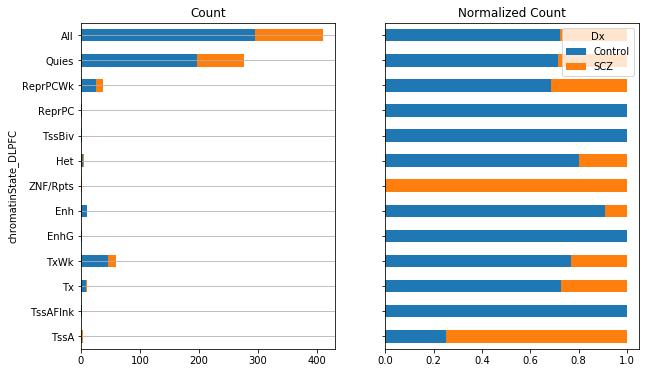

In [6]:
state_Dx_norm = pd.crosstab(calls['chromatinState_DLPFC'], calls['Dx'], normalize='index', margins=True)
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 6))
state_Dx[['Control', 'SCZ']].plot.barh(stacked=True, ax=ax[0], legend=False, title='Count')
ax[0].grid(True, axis='y')
state_Dx_norm.plot.barh(stacked=True, ax=ax[1], title='Normalized Count')

(2.5, 0.5)

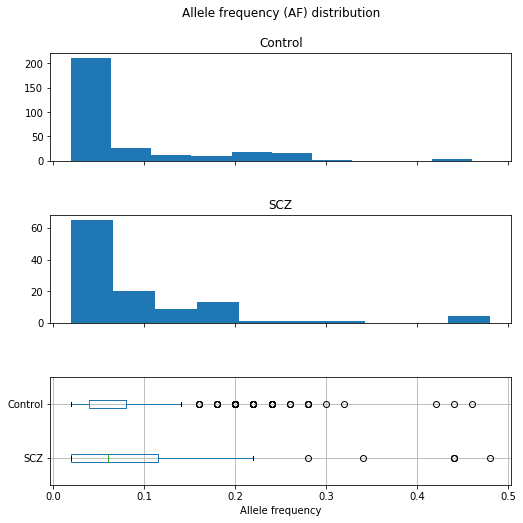

In [7]:
fig, ax = plt.subplots(3, 1, figsize=(8, 8), sharex=True)
calls.hist(column='AF', by='Dx', ax=ax[0:2], grid=True)
calls.boxplot('AF', by='Dx', vert=False, ax=ax[2], showfliers=True)
ax[2].set_xlabel('Allele frequency')
ax[2].set_title('')
fig.suptitle('Allele frequency (AF) distribution')
ax[2].set_ylim(2.5, 0.5)

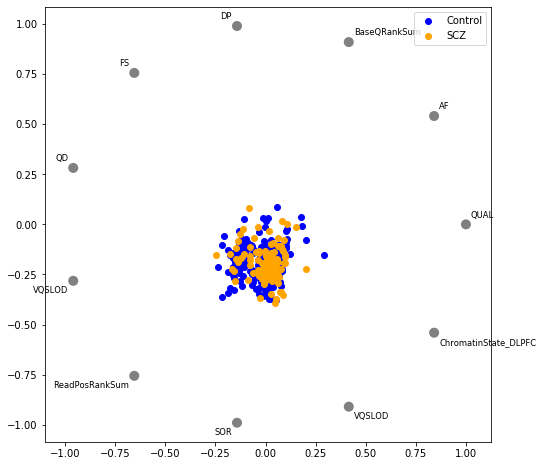

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
sel_cols = ['Dx', 'QUAL', 'AF', 'BaseQRankSum', 'DP', 'FS', 'QD', 'VQSLOD', 'ReadPosRankSum', 'SOR', 'VQSLOD', 'ChromatinState_DLPFC']
ppl.radviz(calls.loc[:, sel_cols], class_column='Dx', ax=ax, color=['blue', 'orange'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

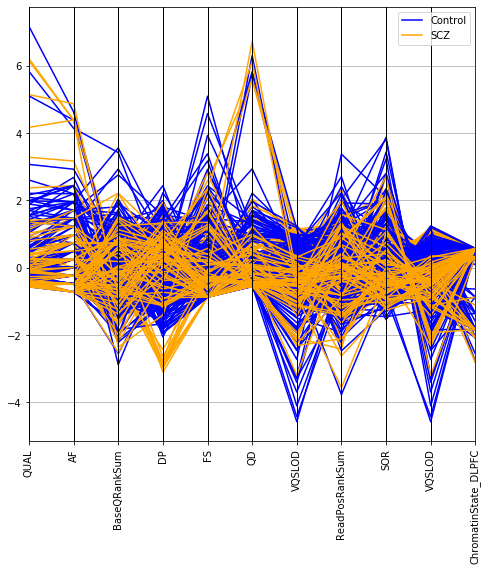

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
df = calls.loc[:, sel_cols[1:]]
# First method
df.loc[:, :] = preprocessing.scale(df)
# Second method
#df = (df - df.mean(axis=0)) / df.std(axis=0)
# Third method
#df.loc[:, :] = preprocessing.StandardScaler().fit_transform(df)
df.loc[:, 'Dx'] = calls['Dx']
ppl.parallel_coordinates(df, class_column='Dx', ax=ax, color=['blue', 'orange'])
plt.xticks(rotation=90)

In [10]:
%connect_info

{
  "shell_port": 35279,
  "iopub_port": 44525,
  "stdin_port": 53245,
  "control_port": 36197,
  "hb_port": 44885,
  "ip": "127.0.0.1",
  "key": "0bf593fb-8b82f1c154e62cbd546e7507",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-9b407a41-6869-4213-b79b-cce591480b8f.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
